Implementing MLPs with Keras

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [ ]:
class_names = ["T-shirt/top", "Trouse", "Pullover", "Dress", "Coat",
                "Sandal", "shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

Creating a sequential model

In [ ]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

First line creates a sequential model, Sequential API, simplest kind of nerual network

Next we build first layer and add it to the model, Flatten layer whose role is to convert each input image into a 1D array

Next add dense layer with 300 neurons, using relu function! And add a second dense layer with 100 neurons, activation funtion Relu! Finally adding a dense layer with 10 neurons (one per class), using softmax function. 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = 'sgd', 
              metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7069 - accuracy: 0.7659 - val_loss: 0.5057 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4836 - accuracy: 0.8307 - val_loss: 0.4880 - val_accuracy: 0.8320
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4388 - accuracy: 0.8453 - val_loss: 0.4386 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4122 - accuracy: 0.8534 - val_loss: 0.4117 - val_accuracy: 0.8536
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3904 - accuracy: 0.8609 - val_loss: 0.4129 - val_accuracy: 0.8506
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3752 - accuracy: 0.8671 - val_loss: 0.3779 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3612 - accuracy: 0.8717 - val_loss: 0.3894 - val_accuracy:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

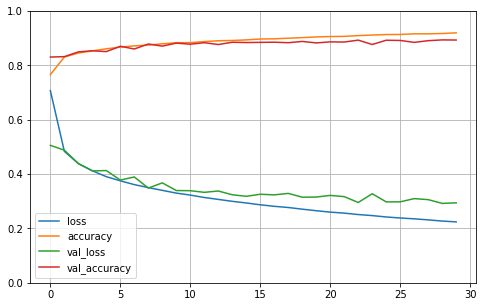

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8811


[0.3306012451648712, 0.8810999989509583]

In [ ]:
X_new = X_test[:3]


In [ ]:
y_proba = model.predict(X_new)

In [ ]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.03, 0.  , 0.93],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

AttributeError: ignored

In [ ]:
np.array(class_names)[y_pred]

IndexError: ignored